In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "2018_cleaned_personal_property_list.csv"  # Update this path accordingly
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
df


,AGENCY_CODE,STATE_AGENCY,PROPERTY_TYPE,PROPERTY_CLASSIFICATION,PROPERTY_NAME,DATE_ACQUIRED_OR_INSTALLED,VALUE_OR_COST,IT_OR_NON-IT
0,10.0,OSU-STILLWATER,Personal Property,Owned,"Data Terminal, Ti (S Cint. Ctr) Mdl 700As",1977-08-15,20600.00,IT
1,10.0,OSU-STILLWATER,Personal Property,Owned,Hp Graphics Translat Or,1981-08-07,9328.93,IT
2,10.0,OSU-STILLWATER,Personal Property,Owned,Single Channel Ekg Printer/Recorder,1982-05-26,5625.00,IT
3,10.0,OSU-STILLWATER,Personal Property,Owned,4643596 Typewriter S Electric Iii,1982-12-15,913.80,IT
4,10.0,OSU-STILLWATER,Personal Property,Owned,Software Composition Of Tatex From 83-96,1983-09-12,97880.55,IT
...,...,...,...,...,...,...,...,...
100101,981.0,OKLAHOMA MUNICIPAL POWER AUTHORITY,Personal Property,NaN,Cwip - Scada Building,2018-01-01,46085.73,NON-IT
100102,981.0,OKLAHOMA MUNICIPAL POWER AUTHORITY,Personal Property,NaN,Scada Wireless Update,2018-01-01,7966.48,NON-IT
100103,981.0,OKLAHOMA MUNICIPAL POWER AUTHORITY,Personal Property,NaN,Ryan Substation Fencing,2018-02-25,30465.00,NON-IT
100104,981.0,OKLAHOMA MUNICIPAL POWER AUTHORITY,Personal Property,NaN,2018 Ford Taurus,2018-03-30,20810.00,NON-IT


In [3]:
### DESCRIPTIVE ANALYSIS ###
print("Total number of records in the dataset:", len(df))
print("Unique state agencies:", df['STATE_AGENCY'].nunique())
print("Most common property types:")
print(df['PROPERTY_TYPE'].value_counts().head(10))
print("\nProperty classification distribution:")
print(df['PROPERTY_NAME'].value_counts())
print("\nIT vs Non-IT distribution:")
print(df['IT_OR_NON-IT'].value_counts())

Total number of records in the dataset: 100106
Unique state agencies: 123
Most common property types:
PROPERTY_TYPE
Personal Property    100106
Name: count, dtype: int64

Property classification distribution:
PROPERTY_NAME
Dell Inc                     502
Laptop                       349
Dell Computer                300
Student Union                279
Computer                     257
                            ... 
Amx 8400 Experience Kit        1
Array White Ceiling Mic        1
Project Xga 3500 Ansi Lcd      1
Ups Smart 1000 Rm2U            1
Fairview Land                  1
Name: count, Length: 71386, dtype: int64

IT vs Non-IT distribution:
IT_OR_NON-IT
NON-IT    50960
IT        43410
Name: count, dtype: int64


In [4]:
### FINANCIAL ANALYSIS ###
# Convert Value or Cost to numeric
df['VALUE_OR_COST'] = pd.to_numeric(df['VALUE_OR_COST'], errors='coerce')

In [5]:
print("\nTotal value of all properties:", df['VALUE_OR_COST'].sum())
print("Average cost of IT properties:", df[df['IT_OR_NON-IT'] == 'IT']['VALUE_OR_COST' ].mean())
print("Average cost of Non-IT properties:", df[df['IT_OR_NON-IT'] == 'NON-IT']['VALUE_OR_COST'].mean())


Total value of all properties: 3046076136.2179537
Average cost of IT properties: 9458.098357806413
Average cost of Non-IT properties: 50441.45526640518


In [6]:
# Most expensive property
most_expensive = df.loc[df['VALUE_OR_COST'].idxmax()]
print("Most expensive property:", most_expensive['PROPERTY_NAME'], "- Value:", most_expensive['VALUE_OR_COST'])

# Agency with the highest total property value
top_agency = df.groupby('STATE_AGENCY')['VALUE_OR_COST'].sum().idxmax()
print("Agency with highest total property value:", top_agency)

Most expensive property: Turk Power Plant - Value: 128465942.3
Agency with highest total property value: OKLAHOMA MUNICIPAL POWER AUTHORITY


In [7]:
### CATEGORICAL ANALYSIS ###
print("\nTop 10 most frequently occurring property names:")
print(df['PROPERTY_NAME'].value_counts().head(10))
print("Agencies with the most diverse range of property types:")
print(df.groupby('STATE_AGENCY')['PROPERTY_TYPE'].nunique().sort_values(ascending=False).head(10))


Top 10 most frequently occurring property names:
PROPERTY_NAME
Dell Inc             502
Laptop               349
Dell Computer        300
Student Union        279
Computer             257
Cpu                  227
Printer              206
Desktop Computer     184
Projector            179
Computer, Desktop    160
Name: count, dtype: int64
Agencies with the most diverse range of property types:
STATE_AGENCY
ABSTRACTORS BOARD                             1
OPTOMETRY BOARD                               1
OKLAHOMA WORKERS COMPENSATION COMMISSION      1
OKLAHOMA USED MOTOR PARTS COMMISSION          1
OKLAHOMA TURNPIKE AUTHORITY                   1
OKLAHOMA TAX COMMISSION                       1
OKLAHOMA STUDENT LOAN AUTHORITY               1
OKLAHOMA SCHOOL OF SCIENCE AND MATHEMATICS    1
OKLAHOMA REAL ESTATE COMMISSION               1
OKLAHOMA MUNICIPAL POWER AUTHORITY            1
Name: PROPERTY_TYPE, dtype: int64


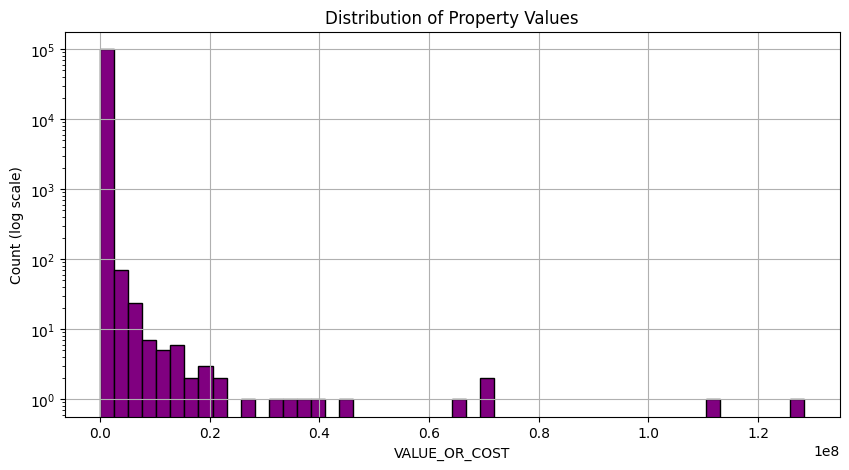

In [8]:
### DATA VISUALIZATION ###
# Histogram of property values
plt.figure(figsize=(10,5))
df['VALUE_OR_COST'].dropna().hist(bins=50, color='purple', edgecolor='black')
plt.yscale('log')
plt.title("Distribution of Property Values")
plt.xlabel("VALUE_OR_COST")
plt.ylabel("Count (log scale)")
plt.show()

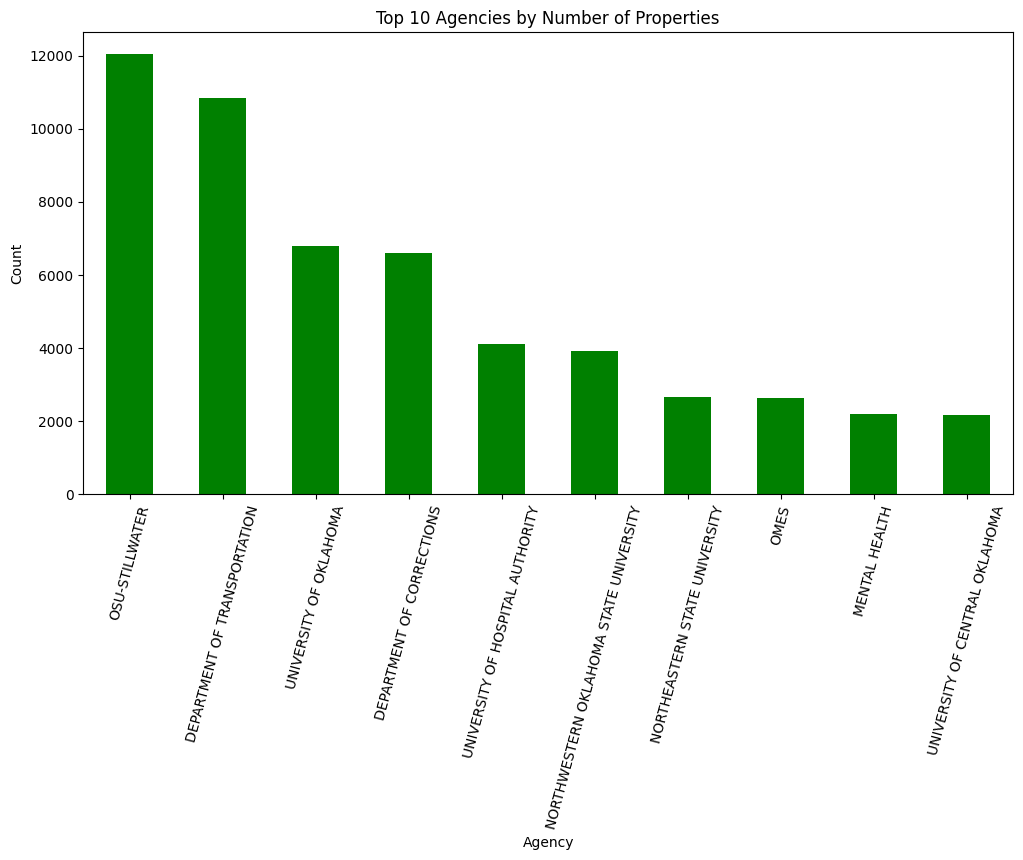

In [9]:
# Properties per agency (top 10)
plt.figure(figsize=(12,6))
df['STATE_AGENCY'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Agencies by Number of Properties")
plt.xlabel("Agency")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

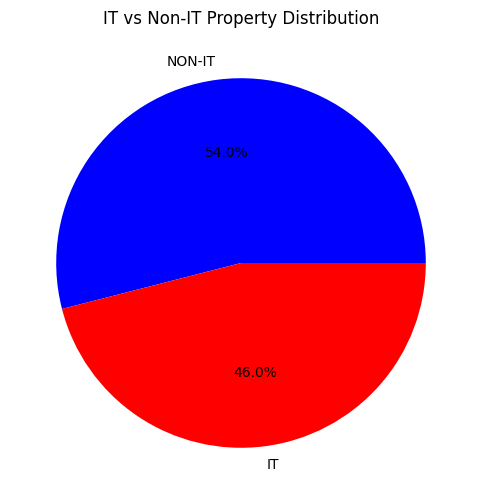

In [10]:
# IT vs Non-IT properties
plt.figure(figsize=(6,6))
df['IT_OR_NON-IT'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("IT vs Non-IT Property Distribution")
plt.ylabel("")
plt.show()

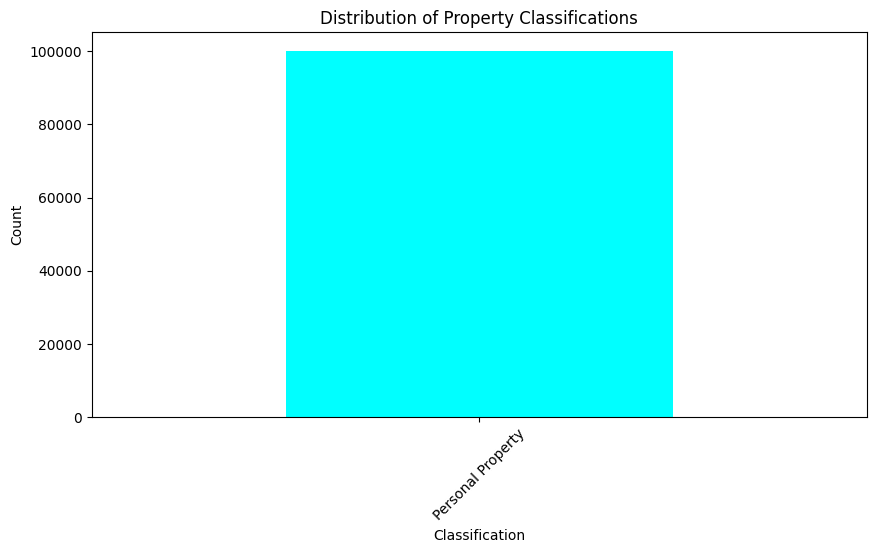

In [11]:
# Property Classification Distribution
plt.figure(figsize=(10,5))
df['PROPERTY_TYPE'].value_counts().plot(kind='bar', color='cyan')
plt.title("Distribution of Property Classifications")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

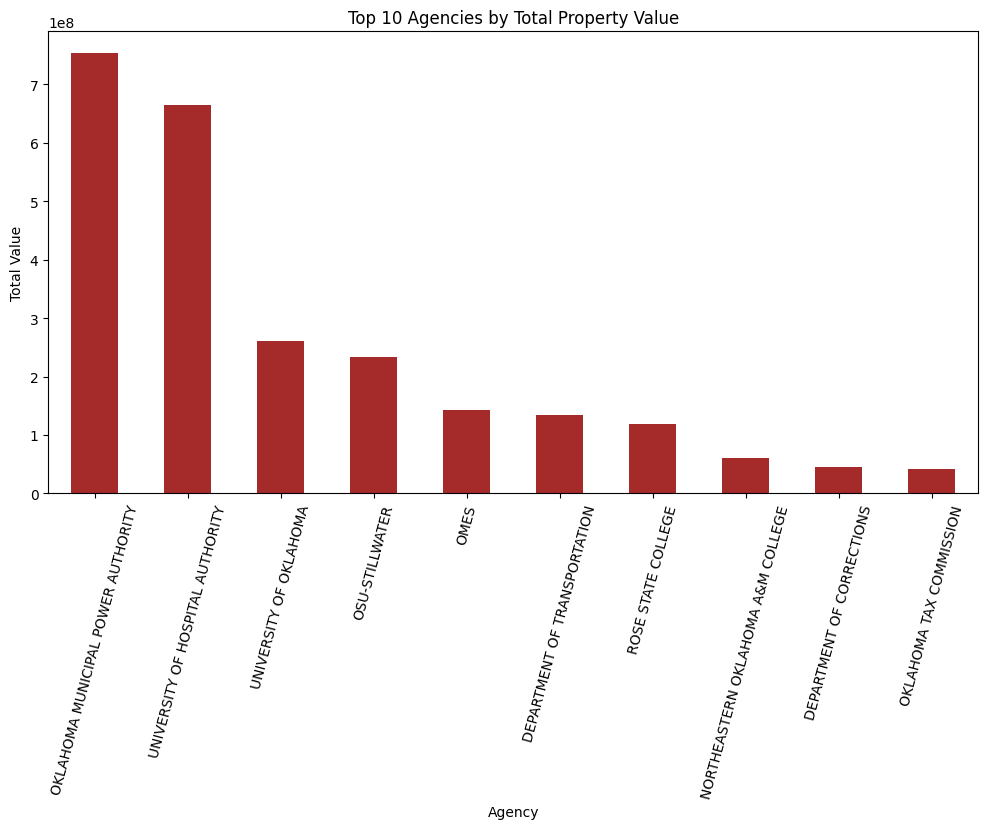

In [12]:
# Top agencies by total property value
plt.figure(figsize=(12,6))
df.groupby('STATE_AGENCY')['VALUE_OR_COST'].sum().nlargest(10).plot(kind='bar', color='brown')
plt.title("Top 10 Agencies by Total Property Value")
plt.xlabel("Agency")
plt.ylabel("Total Value")
plt.xticks(rotation=75)
plt.show()

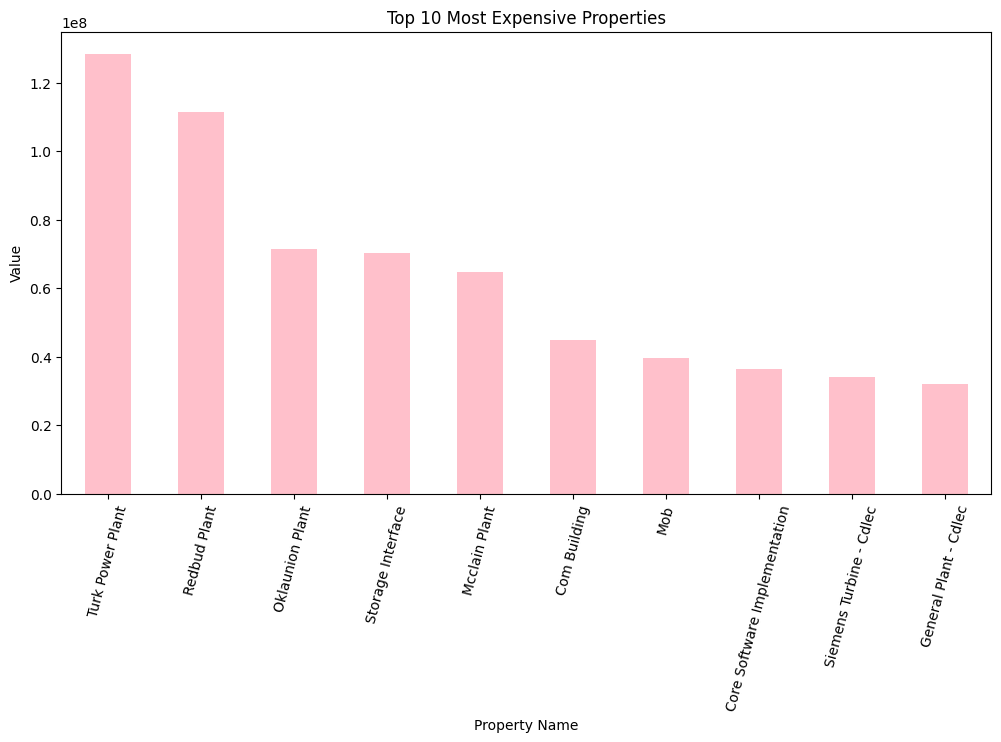

In [13]:
# Top 10 most expensive properties
plt.figure(figsize=(12,6))
df.nlargest(10, 'VALUE_OR_COST').set_index('PROPERTY_NAME')['VALUE_OR_COST'].plot(kind='bar', color='pink')
plt.title("Top 10 Most Expensive Properties")
plt.xlabel("Property Name")
plt.ylabel("Value")
plt.xticks(rotation=75)
plt.show()

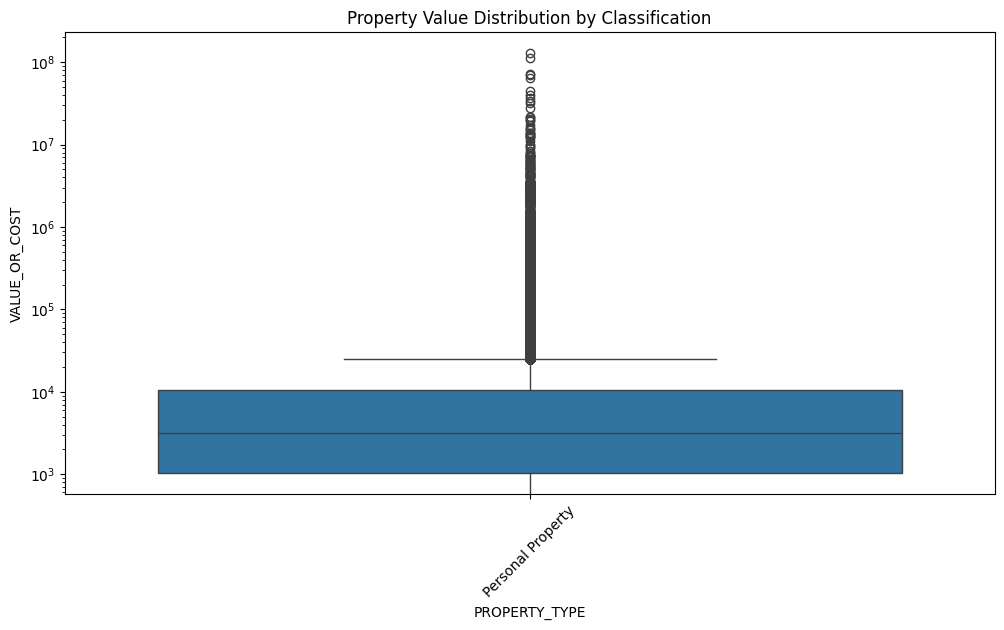

In [14]:
# Box plot of property value by classification
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='PROPERTY_TYPE', y='VALUE_OR_COST')
plt.yscale("log")
plt.title("Property Value Distribution by Classification")
plt.xticks(rotation=45)
plt.show()

In [15]:
print("\nAnalysis completed.")


Analysis completed.
